In [4]:
# Import libraries here
import json
import pickle

import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from teaching_tools.widgets import ConfusionMatrixWidget

In [5]:
# Load data file
with open("data/taiwan-bankruptcy-data.json", 'r') as f:
    taiwan_data = json.load(f)
print(type(taiwan_data))

<class 'dict'>


In [6]:
taiwan_data_keys = taiwan_data.keys()
print(taiwan_data_keys)

dict_keys(['schema', 'metadata', 'observations'])


In [7]:
n_companies = len(taiwan_data['observations'])
print(n_companies)

6137


In [8]:
taiwan_data['observations'][0]

{'id': 1,
 'bankrupt': True,
 'feat_1': 0.3705942573,
 'feat_2': 0.4243894461,
 'feat_3': 0.4057497725,
 'feat_4': 0.6014572133,
 'feat_5': 0.6014572133,
 'feat_6': 0.9989692032,
 'feat_7': 0.7968871459,
 'feat_8': 0.8088093609,
 'feat_9': 0.3026464339,
 'feat_10': 0.7809848502,
 'feat_11': 0.0001256969,
 'feat_12': 0.0,
 'feat_13': 0.4581431435,
 'feat_14': 0.0007250725,
 'feat_15': 0.0,
 'feat_16': 0.1479499389,
 'feat_17': 0.1479499389,
 'feat_18': 0.1479499389,
 'feat_19': 0.1691405881,
 'feat_20': 0.3116644267,
 'feat_21': 0.0175597804,
 'feat_22': 0.0959205276,
 'feat_23': 0.1387361603,
 'feat_24': 0.0221022784,
 'feat_25': 0.8481949945,
 'feat_26': 0.6889794628,
 'feat_27': 0.6889794628,
 'feat_28': 0.2175353862,
 'feat_29': 4980000000.0,
 'feat_30': 0.0003269773,
 'feat_31': 0.2630999837,
 'feat_32': 0.363725271,
 'feat_33': 0.0022589633,
 'feat_34': 0.0012077551,
 'feat_35': 0.629951302,
 'feat_36': 0.0212659244,
 'feat_37': 0.2075762615,
 'feat_38': 0.7924237385,
 'feat_39': 

In [9]:
n_features = len(taiwan_data['observations'][0])
print(n_features)

97


In [11]:
# Create wrangle function
def wrangle(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame().from_dict(data['observations']).set_index('id')
    return df

In [12]:
df = wrangle('data/taiwan-bankruptcy-data.json')
print("df shape:", df.shape)
df.info()

df shape: (6137, 96)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6137 entries, 1 to 6819
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bankrupt  6137 non-null   bool   
 1   feat_1    6137 non-null   float64
 2   feat_2    6137 non-null   float64
 3   feat_3    6137 non-null   float64
 4   feat_4    6137 non-null   float64
 5   feat_5    6137 non-null   float64
 6   feat_6    6137 non-null   float64
 7   feat_7    6137 non-null   float64
 8   feat_8    6137 non-null   float64
 9   feat_9    6137 non-null   float64
 10  feat_10   6137 non-null   float64
 11  feat_11   6137 non-null   float64
 12  feat_12   6137 non-null   float64
 13  feat_13   6137 non-null   float64
 14  feat_14   6137 non-null   float64
 15  feat_15   6137 non-null   float64
 16  feat_16   6137 non-null   float64
 17  feat_17   6137 non-null   float64
 18  feat_18   6137 non-null   float64
 19  feat_19   6137 non-null   float64
 20  feat_20  

In [13]:
nans = lambda y: [(df[x].count() - df[x].dropna().count()) for x in df.columns]
nans_by_col = pd.Series(nans(1), index=df.columns)
print("nans_by_col shape:", nans_by_col.shape)

nans_by_col shape: (96,)


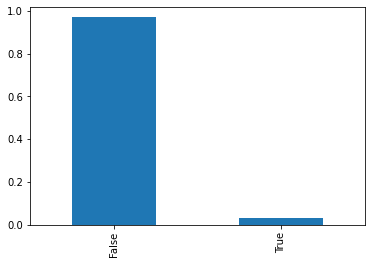

In [14]:
# Plot class balance
df['bankrupt'].value_counts(normalize=True).plot(kind='bar')

# Don't delete the code below 👇
plt.savefig("images/5-5-7.png", dpi=150)


In [15]:
target = 'bankrupt'
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


In [17]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


In [18]:
clf = RandomForestClassifier(random_state=42)

In [19]:
cv_scores = cross_val_score(clf, X_train_over, y_train_over, n_jobs=-1, cv=5)
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


In [20]:
params = {
    'n_estimators': range(25, 100, 25),
    'max_depth': range(10, 50, 10)
}

In [21]:
model = GridSearchCV(
    clf,
    param_grid=params,
    n_jobs=-1,
    cv=5,
    verbose=1
)

In [22]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [23]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,4.142788,0.172661,0.069385,0.003997,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.992643,0.994745,0.994742,0.994217,0.995794,0.994428,0.001029,1
10,3.427499,0.432097,0.043787,0.004966,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992643,0.995271,0.994217,0.993691,0.996320,0.994428,0.001270,2
9,1.763339,0.056662,0.032388,0.002498,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.994220,0.994220,0.994742,0.993165,0.994742,0.994218,0.000576,3
8,5.031353,0.074620,0.108178,0.066954,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992118,0.993694,0.993165,0.993691,0.994742,0.993482,0.000853,4
7,3.367344,0.047705,0.053170,0.005943,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992118,0.993694,0.992114,0.993165,0.994217,0.993061,0.000841,5


In [24]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 75}


In [25]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9764


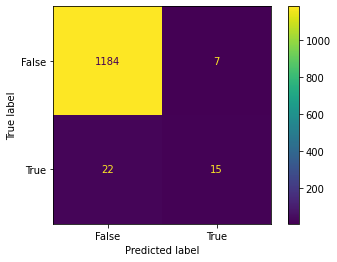

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# Don't delete the code below 👇
plt.savefig("images/5-5-16.png", dpi=150)

In [27]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1191
        True       0.68      0.41      0.51        37

    accuracy                           0.98      1228
   macro avg       0.83      0.70      0.75      1228
weighted avg       0.97      0.98      0.97      1228



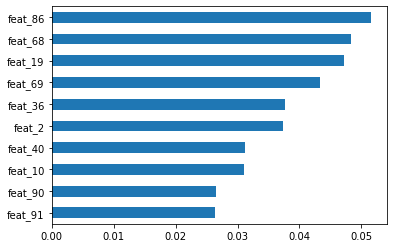

In [28]:
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

feat_imp.tail(10).plot(kind='barh')
# Don't delete the code below 👇
plt.savefig("images/5-5-17.png", dpi=150)

In [35]:
# Save model
with open('model/model-5-5.pkl', 'wb') as f:
    pickle.dump(model, f)

In [38]:
# Import your module
from scripts.my_predictor import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/taiwan-bankruptcy-data-test-features.json",
    model_filepath="model/model-5-5.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.nunique()

predictions shape: (682,)


2